In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import polars.selectors as cs
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import datetime as dt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

In [37]:
df_path = r"F:\Datasets\CSV datasets\Bank_Transaction_Fraud_Detection.csv"

In [38]:
df = pl.read_csv(df_path, try_parse_dates=True)

In [39]:
df = df.with_columns(
    pl.col('Account_Balance') * 0.011007299,
    pl.col('Transaction_Amount') * 0.011007299,
)

In [40]:
df = df.drop(
    'Customer_ID', 'Transaction_ID', 'Customer_Contact', 'Customer_Email',
    'Transaction_Currency', 'Transaction_Currency', 'Merchant_ID',
    'Customer_Name'
)

In [41]:
df['State'].value_counts()

State,count
str,u32
"""Manipur""",5869
"""West Bengal""",5851
"""Telangana""",5952
"""Rajasthan""",5795
"""Dadra and Nagar Haveli and Dam…",5857
…,…
"""Bihar""",5857
"""Odisha""",5899
"""Jharkhand""",5898


In [42]:
df.select('*')

Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
str,i64,str,str,str,str,date,time,f64,str,str,f64,str,str,str,i64,str
"""Male""",60,"""Kerala""","""Thiruvananthapuram""","""Thiruvananthapuram Branch""","""Savings""",2025-01-23,16:04:07,356.80655,"""Transfer""","""Restaurant""",820.674164,"""Voice Assistant""","""Thiruvananthapuram, Kerala""","""POS""",0,"""Bitcoin transaction"""
"""Female""",51,"""Maharashtra""","""Nashik""","""Nashik Branch""","""Business""",2025-01-11,17:14:53,480.167001,"""Bill Payment""","""Restaurant""",821.393931,"""POS Mobile Device""","""Nashik, Maharashtra""","""Desktop""",0,"""Grocery delivery"""
"""Male""",20,"""Bihar""","""Bhagalpur""","""Bhagalpur Branch""","""Savings""",2025-01-25,03:09:52,694.148454,"""Bill Payment""","""Groceries""",735.485595,"""ATM""","""Bhagalpur, Bihar""","""Desktop""",0,"""Mutual fund investment"""
"""Female""",57,"""Tamil Nadu""","""Chennai""","""Chennai Branch""","""Business""",2025-01-19,12:27:02,154.110111,"""Debit""","""Entertainment""",640.372515,"""POS Mobile App""","""Chennai, Tamil Nadu""","""Mobile""",0,"""Food delivery"""
"""Female""",43,"""Punjab""","""Amritsar""","""Amritsar Branch""","""Savings""",2025-01-30,18:30:46,201.820588,"""Transfer""","""Entertainment""",177.311736,"""Virtual Card""","""Amritsar, Punjab""","""Mobile""",0,"""Debt repayment"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Female""",55,"""Dadra and Nagar Haveli and Dam…","""Diu""","""Diu Branch""","""Business""",2025-01-08,18:42:09,1084.370192,"""Credit""","""Restaurant""",412.499741,"""Desktop/Laptop""","""Diu, Dadra and Nagar Haveli an…","""ATM""",0,"""ATM withdrawal"""
"""Male""",51,"""Manipur""","""Kangpokpi""","""Kangpokpi Branch""","""Business""",2025-01-01,20:51:21,446.825342,"""Withdrawal""","""Groceries""",583.796319,"""ATM""","""Kangpokpi, Manipur""","""ATM""",0,"""Subscription box"""
"""Female""",41,"""Chandigarh""","""Chandigarh""","""Chandigarh Branch""","""Savings""",2025-01-28,10:47:40,677.82617,"""Withdrawal""","""Health""",1059.181309,"""ATM""","""Chandigarh, Chandigarh""","""Desktop""",0,"""Charity donation"""


In [43]:
pl.DataFrame({
    "column": df.columns,
    "unique_count": [df[col].n_unique() for col in df.columns]
})

column,unique_count
str,i64
"""Gender""",2
"""Age""",53
"""State""",34
"""City""",145
"""Bank_Branch""",145
…,…
"""Transaction_Device""",20
"""Transaction_Location""",148
"""Device_Type""",4


In [44]:
df = df.with_columns(
    pl.col('Transaction_Date').dt.year().alias('Year'),
    pl.col('Transaction_Date').dt.month().alias('Month'),
    pl.col('Transaction_Date').dt.day().alias('Day'),
    pl.col('Transaction_Time').dt.hour().alias('Hour'),
    pl.col('Transaction_Time').dt.minute().alias('Minute'),
    pl.col('Transaction_Time').dt.second().alias('Second'),
)

In [45]:
df = df.drop(
    'Transaction_Date', 'Transaction_Time'
)

In [46]:
df

Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Year,Month,Day,Hour,Minute,Second
str,i64,str,str,str,str,f64,str,str,f64,str,str,str,i64,str,i32,i8,i8,i8,i8,i8
"""Male""",60,"""Kerala""","""Thiruvananthapuram""","""Thiruvananthapuram Branch""","""Savings""",356.80655,"""Transfer""","""Restaurant""",820.674164,"""Voice Assistant""","""Thiruvananthapuram, Kerala""","""POS""",0,"""Bitcoin transaction""",2025,1,23,16,4,7
"""Female""",51,"""Maharashtra""","""Nashik""","""Nashik Branch""","""Business""",480.167001,"""Bill Payment""","""Restaurant""",821.393931,"""POS Mobile Device""","""Nashik, Maharashtra""","""Desktop""",0,"""Grocery delivery""",2025,1,11,17,14,53
"""Male""",20,"""Bihar""","""Bhagalpur""","""Bhagalpur Branch""","""Savings""",694.148454,"""Bill Payment""","""Groceries""",735.485595,"""ATM""","""Bhagalpur, Bihar""","""Desktop""",0,"""Mutual fund investment""",2025,1,25,3,9,52
"""Female""",57,"""Tamil Nadu""","""Chennai""","""Chennai Branch""","""Business""",154.110111,"""Debit""","""Entertainment""",640.372515,"""POS Mobile App""","""Chennai, Tamil Nadu""","""Mobile""",0,"""Food delivery""",2025,1,19,12,27,2
"""Female""",43,"""Punjab""","""Amritsar""","""Amritsar Branch""","""Savings""",201.820588,"""Transfer""","""Entertainment""",177.311736,"""Virtual Card""","""Amritsar, Punjab""","""Mobile""",0,"""Debt repayment""",2025,1,30,18,30,46
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Female""",55,"""Dadra and Nagar Haveli and Dam…","""Diu""","""Diu Branch""","""Business""",1084.370192,"""Credit""","""Restaurant""",412.499741,"""Desktop/Laptop""","""Diu, Dadra and Nagar Haveli an…","""ATM""",0,"""ATM withdrawal""",2025,1,8,18,42,9
"""Male""",51,"""Manipur""","""Kangpokpi""","""Kangpokpi Branch""","""Business""",446.825342,"""Withdrawal""","""Groceries""",583.796319,"""ATM""","""Kangpokpi, Manipur""","""ATM""",0,"""Subscription box""",2025,1,1,20,51,21
"""Female""",41,"""Chandigarh""","""Chandigarh""","""Chandigarh Branch""","""Savings""",677.82617,"""Withdrawal""","""Health""",1059.181309,"""ATM""","""Chandigarh, Chandigarh""","""Desktop""",0,"""Charity donation""",2025,1,28,10,47,40


In [47]:
X = df.select(cs.exclude('Is_Fraud'))

In [48]:
y = df.get_column('Is_Fraud')

In [49]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [50]:
# X.select(cs.string()).columns

In [51]:
# X.select(cs.numeric()).columns

In [52]:
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('encoder', OneHotEncoder(
#             handle_unknown='ignore', sparse_output=False, drop='first'),
#         X.select(cs.string()).columns),
#         ('passthrough', 'passthrough', X.select(cs.numeric()).columns)
#     ])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.feature_extraction import FeatureHasher

In [56]:
def prepare_for_hashing(df, categorical_cols):
    df_copy = df.clone()
    for col in categorical_cols:
        df_copy = df_copy.with_columns(pl.col(col).cast(pl.Utf8).alias(col))
    result = df_copy.select(categorical_cols).to_numpy().tolist()

    return [[str(item) for item in row] for row in result]

In [57]:
categorical_cols = X_train.select(cs.string()).columns
numerical_cols = X_train.select(cs.numeric()).columns

In [58]:
X_train_list = prepare_for_hashing(X_train, categorical_cols)
X_test_list = prepare_for_hashing(X_test, categorical_cols)

In [59]:
hasher = FeatureHasher(n_features=64, input_type='string')
X_train_hashed = hasher.fit_transform(X_train_list)
X_test_hashed = hasher.transform(X_test_list)

In [60]:
smote = SMOTE(random_state=42)

In [61]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_hashed, y_train)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_hashed)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
logistic_reg = LogisticRegression(solver='saga', max_iter=1000)

In [78]:
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'l1_ratio': [0.25, 0.5, 0.75],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': [None],
        'class_weight': [None, 'balanced']
    }
]

In [79]:
logistic_reg_cv = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=10,
    scoring='f1_macro'
)

In [80]:
logistic_reg_cv.fit(X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             n_jobs=10,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'l1_ratio': [0.25, 0.5, 0.75],
                          'penalty': ['elasticnet']},
                         {'class_weight': [None, 'balanced'],
                          'penalty': [None]}],
             scoring='f1_macro', verbose=2)

In [82]:
logistic_reg_cv.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [83]:
logistic_reg_cv.best_score_

np.float64(0.5230014685816256)

In [84]:
logistic_reg_cv.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='saga')

In [85]:
y_pred = logistic_reg_cv.predict(X_test_scaled)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

In [87]:
accuracy_score(y_test, y_pred)

0.517175

In [88]:
f1_score(y_test, y_pred)

0.09358426808091237

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.52      0.67     37955
           1       0.05      0.49      0.09      2045

    accuracy                           0.52     40000
   macro avg       0.50      0.50      0.38     40000
weighted avg       0.90      0.52      0.64     40000



In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[19690, 18265],
       [ 1048,   997]])

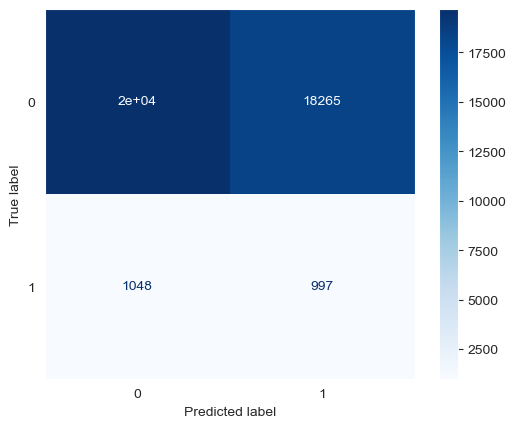

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues').ax_.grid(False)

In [92]:
result = pl.DataFrame({
    'Model': [
        'Accuracy Score',
        'F1 Score',
        'True Negative',
        'False Negative',
        'False Positive',
        'True Positive'
    ],
    'Logistic Regression CV': [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        conf_matrix[0, 0],
        conf_matrix[0, 1],
        conf_matrix[1, 0],
        conf_matrix[1, 1]],
})

In [94]:
result

Model,Logistic Regression CV
str,f64
"""Accuracy Score""",0.517175
"""F1 Score""",0.093584
"""True Negative""",19690.0
"""False Negative""",18265.0
"""False Positive""",1048.0
"""True Positive""",997.0


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [96]:
random_forest = RandomForestClassifier(random_state=42)

In [97]:
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [98]:
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    n_jobs=6,
    scoring='f1_macro',
    random_state=42
)

In [ ]:
random_search.fit(X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
